# CAPSTONE PROJECT 2 EDA

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", None)

## Scraping Images from Google Images

To scrap images from Google, use this module https://github.com/hardikvasa/google-images-download.  Depending on how the module is intsalled, you can run the image scraper from the command line.  

I used: pip install google_images_download

To download more than 100 images at time, you will need to use the Chrome browser and download chromedriver http://chromedriver.chromium.org/.  Unzip the file and move the .exe to a folder to path into later.  Please note the version of Chrome browser you are using and download the appropriate version of chromedriver.

Once chomedriver is downloaded and google-images-download is installed, open the command prompt and cd into the directory you wish to save images in.

Example: Running the command below in the command line will search for 'poison ivy leaves', and download 500 images.  Please read the instructions in the github repo for 'google-images-download' to view all CLI arguments.  Note, if downloading more than 100+ images you will need to add '--chromedriver' + full path to chromedriver.exe.

googleimagesdownload -k "poison ivy leaves" -l 500 --chromedriver C:\\Users\jltsa\Desktop\Springboard\Capstone_Project_2\chromedriver.exe


For this projects, we will need pictures of leaves from poison ivy, poison oak, and poison sumac.  After downloading the images, it will still require soem manually work to remove images that are not suitable for image classification such as wrong images of leaves or irrelavant image results.


Loading in an image of poison ivy to see what it looks like

In [16]:
img = cv2.imread('C:\\Users\\jltsa\\Desktop\\Project_2\\images\\poison_ivy\\150. leaves.jpg',cv2.IMREAD_COLOR)

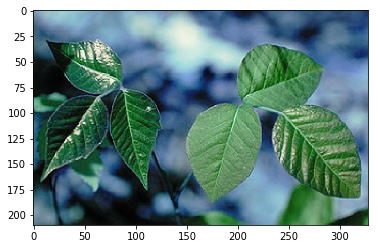

In [17]:
plt.imshow(img)
plt.show()

### Preprocessing for AlexNet

In [18]:
img.shape

(210, 328, 3)

In [27]:
img = cv2.resize(img, (227, 227))

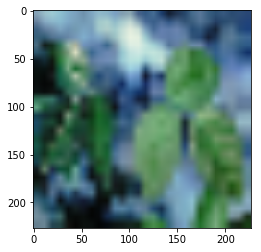

In [28]:
plt.imshow(img)
plt.show()

In [32]:
img

array([[[132, 161, 182],
        [132, 161, 182],
        [132, 161, 182],
        ...,
        [ 41,  71, 117],
        [ 41,  71, 117],
        [ 41,  71, 117]],

       [[132, 161, 182],
        [132, 161, 182],
        [132, 161, 182],
        ...,
        [ 41,  71, 117],
        [ 41,  71, 117],
        [ 41,  71, 117]],

       [[132, 161, 182],
        [132, 161, 182],
        [132, 161, 182],
        ...,
        [ 41,  71, 117],
        [ 41,  71, 117],
        [ 41,  71, 117]],

       ...,

       [[101, 127, 143],
        [101, 127, 143],
        [101, 127, 143],
        ...,
        [ 24,  61,  22],
        [ 24,  61,  22],
        [ 24,  61,  22]],

       [[101, 127, 143],
        [101, 127, 143],
        [101, 127, 143],
        ...,
        [ 24,  61,  22],
        [ 24,  61,  22],
        [ 24,  61,  22]],

       [[101, 127, 143],
        [101, 127, 143],
        [101, 127, 143],
        ...,
        [ 24,  61,  22],
        [ 24,  61,  22],
        [ 24,  61,  22]]

In [30]:
img2 = np.array(img, dtype='float') / 255.0

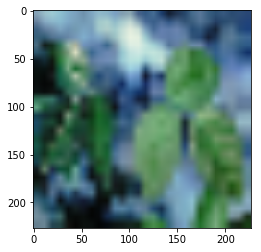

In [31]:
plt.imshow(img2)
plt.show()

In [33]:
img2

array([[[0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        ...,
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353]],

       [[0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        ...,
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353]],

       [[0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        [0.51764706, 0.63137255, 0.71372549],
        ...,
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353],
        [0.16078431, 0.27843137, 0.45882353]],

       ...,

       [[0.39607843, 0.49803922, 0.56078431],
        [0.39607843, 0.49803922, 0.56078431],
        [0.39607843, 0

Possible Preprocessing steps for images:
    
1) Uniform  aspect ratio - images have the same size and aspect ratio

2) Image scaling - upscale or downscale images to a certain pixel size

3) Mean, Std Dev. of input data

4) Normalizing image inputs - subtracting the mean from each pixel and then dividing by the std dev. from the range [0, 1] or [0, 255]

5) Dimensionality reduction - collapse the rgb channels into a single gray-scale channel

6) Data augmentation 